## Контрольная работа

Задача: Необходимо построить прогнозную модель, которая сможет определить, перестанет ли клиент банка пользоваться кредитной картой.

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('./data/hw7/train.csv'
#, index_col='CLIENTNUM'
)
validation_df = pd.read_csv('./data/hw7/validation.csv'
#, index_col='CLIENTNUM'
)

In [3]:
train_df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,...,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,...,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,...,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,...,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   object 
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   object 
 5   Marital_Status            7595 non-null   object 
 6   Income_Category           7595 non-null   object 
 7   Card_Category             7595 non-null   object 
 8   Months_on_book            7595 non-null   int64  
 9   Total_Relationship_Count  7595 non-null   int64  
 10  Months_Inactive_12_mon    7595 non-null   int64  
 11  Contacts_Count_12_mon     7595 non-null   int64  
 12  Credit_Limit              7595 non-null   float64
 13  Total_Revolving_Bal       7595 non-null   int64  
 14  Avg_Open

In [5]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2532 non-null   int64  
 1   Customer_Age              2532 non-null   int64  
 2   Gender                    2532 non-null   object 
 3   Dependent_count           2532 non-null   int64  
 4   Education_Level           2532 non-null   object 
 5   Marital_Status            2532 non-null   object 
 6   Income_Category           2532 non-null   object 
 7   Card_Category             2532 non-null   object 
 8   Months_on_book            2532 non-null   int64  
 9   Total_Relationship_Count  2532 non-null   int64  
 10  Months_Inactive_12_mon    2532 non-null   int64  
 11  Contacts_Count_12_mon     2532 non-null   int64  
 12  Credit_Limit              2532 non-null   float64
 13  Total_Revolving_Bal       2532 non-null   int64  
 14  Avg_Open

Пропусков данных нет, поэтому приступим к преобразованию строковых данных в числовые

In [6]:
# Gender
train_df['Gender'].value_counts()

F    4010
M    3585
Name: Gender, dtype: int64

In [7]:
def gen(Gender):
    if Gender == 'M':
        return 1
    elif Gender == 'F':
        return 0
    else: return None

train_df['Gender'] = train_df['Gender'].apply(gen)
validation_df['Gender'] = validation_df['Gender'].apply(gen)

In [8]:
# Education_Level
train_df['Education_Level'].value_counts()

Graduate         2322
High School      1518
Unknown          1169
Uneducated       1126
College           752
Post-Graduate     373
Doctorate         335
Name: Education_Level, dtype: int64

In [9]:
validation_df['Education_Level'].value_counts()

Graduate         806
High School      495
Uneducated       361
Unknown          350
College          261
Post-Graduate    143
Doctorate        116
Name: Education_Level, dtype: int64

In [10]:
ed_levels = {'Uneducated':0, 'Unknown':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
def ed(Education_Level):
    return ed_levels.get(Education_Level)

train_df['Education_Level'] = train_df['Education_Level'].apply(ed)
validation_df['Education_Level'] = validation_df['Education_Level'].apply(ed)

In [11]:
# Marital_Status
train_df['Marital_Status'].value_counts()

Married     3480
Single      2987
Divorced     574
Unknown      554
Name: Marital_Status, dtype: int64

In [12]:
mar_ststus = {'Single':0, 'Married':1, 'Divorced':2, 'Unknown':3}
def mar(Marital_Status):
    return mar_ststus.get(Marital_Status)
train_df['Marital_Status'] = train_df['Marital_Status'].apply(mar)
validation_df['Marital_Status'] = validation_df['Marital_Status'].apply(mar)

In [13]:
#Income_Category
income_cat = {'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
def inc(Income_Category):
    return income_cat.get(Income_Category)

train_df['Income_Category'] = train_df['Income_Category'].apply(inc)
validation_df['Income_Category'] = validation_df['Income_Category'].apply(inc)

In [14]:
# Card_Category
train_df['Card_Category'].value_counts()

Blue        7065
Silver       423
Gold          91
Platinum      16
Name: Card_Category, dtype: int64

In [15]:
card_cat = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
def card(Card_Category):
    return card_cat.get(Card_Category)
train_df['Card_Category'] = train_df['Card_Category'].apply(card)
validation_df['Card_Category'] = validation_df['Card_Category'].apply(card)

In [16]:
# Attrition_Flag
train_df['Attrition_Flag'].value_counts()

Existing Customer    6375
Attrited Customer    1220
Name: Attrition_Flag, dtype: int64

In [17]:
attr_flag = {'Existing Customer':0, 'Attrited Customer':1}
def attr(Attrition_Flag):
    return attr_flag.get(Attrition_Flag)
train_df['Attrition_Flag'] = train_df['Attrition_Flag'].apply(attr)

<AxesSubplot:>

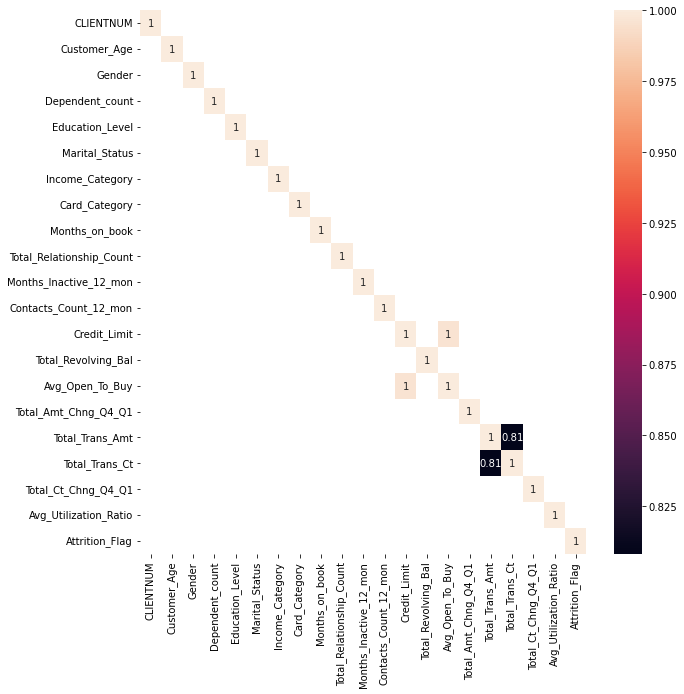

In [18]:
#теперь проверим взаимную корреляцию
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr()[train_df.corr() > 0.8], annot=True)


как видим есть 2 пары коррелированных между собой столбцов
1) Avg_Open_To_Buy - Credit_Limit
2) Total_Trans_Amt - Total_Trans_Ct

In [19]:
# удалим коррелированные столбцы
train_df.drop(['Avg_Open_To_Buy', 'Total_Trans_Ct'], axis = 1, inplace=True) 
validation_df.drop(['Avg_Open_To_Buy', 'Total_Trans_Ct'], axis = 1, inplace=True) 

Обучение модели

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
X = train_df.drop(['CLIENTNUM','Attrition_Flag'], axis=1).to_numpy()
y = train_df['Attrition_Flag'].to_numpy()

In [22]:
# scl = StandardScaler()
# X = scl.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [24]:
from xgboost import XGBClassifier

# pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipeline = make_pipeline(StandardScaler(), XGBClassifier(use_label_encoder=False))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f1_score(y_test, y_pred))

/home/danil/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/danil/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/danil/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


[13:45:01] WARNING: ./src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8571428571428571


Попробуем добавить бустинг

In [25]:
# from sklearn.ensemble import GradientBoostingClassifier
# gbc = GradientBoostingClassifier(
#     # n_estimators = n_estimators
#     #, max_depth=max_depth_in
#     #, learning_rate = learning_rate
#     #, random_state=random_state_in
# )
# gbc.fit(X_train, y_train)
# y_pred = gbc.predict(X_test)

# print(f1_score(y_test, y_pred))

In [26]:
#предсказание на тестовой выборке
X_validation = validation_df.drop('CLIENTNUM', axis=1).to_numpy()
y_validation = pipeline.predict(X_validation)

In [27]:
# выгрузка результатов в нужном формате
prediction_df = pd.DataFrame({'churn': y_validation})

In [28]:
attr_flag = {0:'Existing Customer', 1:'Attrited Customer'}
def attr(Attrition_Flag):
    return attr_flag.get(Attrition_Flag)
prediction_df['churn'] = prediction_df['churn'].apply(attr)

In [29]:
validation_df = validation_df.merge(prediction_df, how='inner', left_index=True, right_index=True)

In [30]:
validation_df.set_index('CLIENTNUM')['churn'].to_csv('./data/hw7/new_7_result_matessovd.csv')